In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Load user_signup_data file as a pandas dataFrame

df = pd.read_csv('n26_v1.csv',index_col=0)

In [69]:
# Check the first rows of user_signup_data file 

df.head(1)

,userid,cpc,organic,affiliate,social,signup_date,campaign
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,0


In [23]:
# Group by date & count the maximum users acquired


df.groupby('signup_date').count().max()

userid       76
cpc          76
organic      76
affiliate    76
social       76
campaign     76
dtype: int64

In [24]:
# Group by date & count the min users acquired


df.groupby('signup_date').count().min()

userid       37
cpc          37
organic      37
affiliate    37
social       37
campaign     37
dtype: int64

In [25]:
# Group by date & count the average number of users acquired

df.groupby('signup_date').count().mean()

userid       54.945055
cpc          54.945055
organic      54.945055
affiliate    54.945055
social       54.945055
campaign     54.945055
dtype: float64

In [59]:
# Group by date, count & save on a new dataFrame

df1=df.groupby('signup_date').count()

In [70]:
# View new dataFrame


df1.head(1)

,userid,cpc,organic,affiliate,social,campaign
signup_date,,,,,,
2017-01-01,67,67,67,67,67,67


In [60]:
# Reset the index & set signup_date as a new column

df2=df1.reset_index()

In [61]:
# Create a new dataFrame with only 2 Columns

df2=df2[['signup_date','userid']]

In [71]:
# View new df

df2.head(1)

,signup_date,user_acquired
0,2017-01-01,67


In [62]:
# Rename column


df2.columns = ['signup_date','user_acquired']

In [63]:
# Statistical description of df2

df2.describe()

,user_acquired
count,91.000000
mean,54.945055
std,7.887209
min,37.000000
25%,50.500000
50%,54.000000
75%,58.500000
max,76.000000


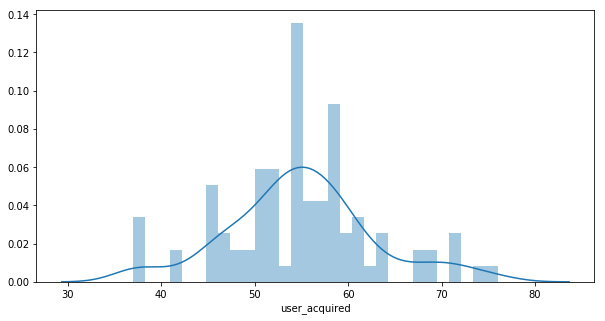

In [64]:
# Plot a distribution viz of the user acquired

plt.figure(figsize=(10,5))
sns.distplot(df2['user_acquired'], bins =30)

In [67]:
# Convert a dataFrame to a numpy array

dataset=df2['user_acquired'].values

(0, 1)

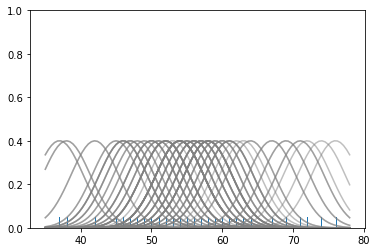

In [68]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)